### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

C:\Users\administor\AppData\Local\Temp\ipykernel_6768\3683955025.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing Datasets

In [4]:
dataframe_fake = pd.read_csv("Fake.csv")
dataframe_true = pd.read_csv("True.csv")

In [5]:
dataframe_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
dataframe_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
# Inserting a column in both of the datasets named Class
# In a fake data frame, we will give a value of 1 to the class and on ther other hand, with true we will allocate 0
# Here 0 Means it is True News, And 1 Means it is a Fake News

dataframe_true["class"] = 0
dataframe_fake["class"] = 1

In [8]:
# Shape of both the datasets

dataframe_fake.shape, dataframe_true.shape

# Here, the dataframe_fake dataset contains 23481 rows and 5 columns And the dataframe_true dataset contains 21417 rows and 5 columns.

((23481, 5), (21417, 5))

### Manual Testing

In [9]:
# We will remove the last 10 rows for manual testing in the fake dataframe
dataframe_fakedataframe_fake_manual_testing = dataframe_fake.tail(10)
for i in range(23480, 23470, -1):
    dataframe_fake.drop([i], axis=0, inplace=True)

# We will remove the last 10 rows for manual testing in the true dataframe
dataframe_truedatarame_true_manual_testing = dataframe_true.tail(10)
for i in range(21416, 21406, -1):
    dataframe_true.drop([i], axis=0, inplace=True)

# Let's have a look at the change in the shape of both datasets
dataframe_fake.shape, dataframe_true.shape

((23471, 5), (21407, 5))

In [10]:
# Inserting the class column in both of the manual testing datasets

dataframe_fake["class"] = 0
dataframe_true["class"] = 1
dataframe_fake.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [9]:
dataframe_true.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


### Merging True And Fake DataFrames

In [12]:
# We will merge dataframe_fake and dataframe_true to form a new dataset And perform machine learning operations on it

dataframe_merge = pd.concat([dataframe_fake, dataframe_true], axis = 0)
dataframe_merge.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
# We will remove the columns that are required for us

dataframe = dataframe_merge.drop(["title", "subject", "date"], axis = 1)
dataframe.head(5)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [14]:
# Let's check if there are any null values in the dataset  

dataframe.isnull().sum()  

text     0
class    0
dtype: int64

In [16]:
# Shuffling 
dataframe = dataframe.sample(frac=1) 
dataframe.reset_index(inplace=True) 
dataframe.drop(["index"], axis=1, inplace=True) 
dataframe.head(5)

,text,class
0,MEXICO CITY (Reuters) - Donald Trump’s combati...,1
1,MOSCOW (Reuters) - Six people were killed when...,1
2,"After the Paris Accord, the United States unde...",0
3,HARARE (Reuters) - A Zimbabwean court found a ...,1
4,ATHENS (Reuters) - Residents on the Greek isla...,1


<Axes: xlabel='class', ylabel='count'>

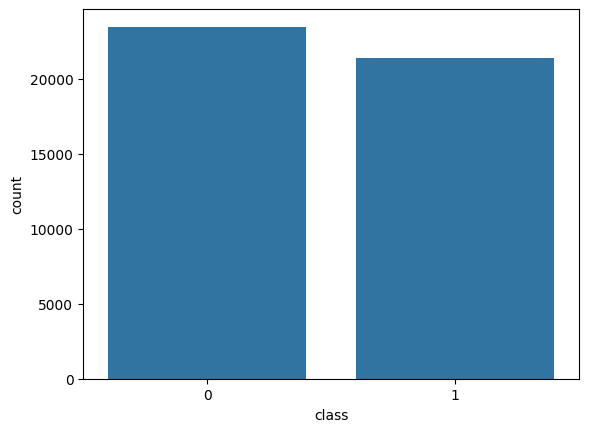

In [17]:
# Now Let’s explore the unique values in each category

sns.countplot(data=dataframe, 
			x='class', 
			order=dataframe['class'].value_counts().index)

In [18]:
from tqdm import tqdm 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\administor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\administor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Once we have all the required modules, we can create a function name preprocess text. This function will preprocess all the data given as input.

def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text

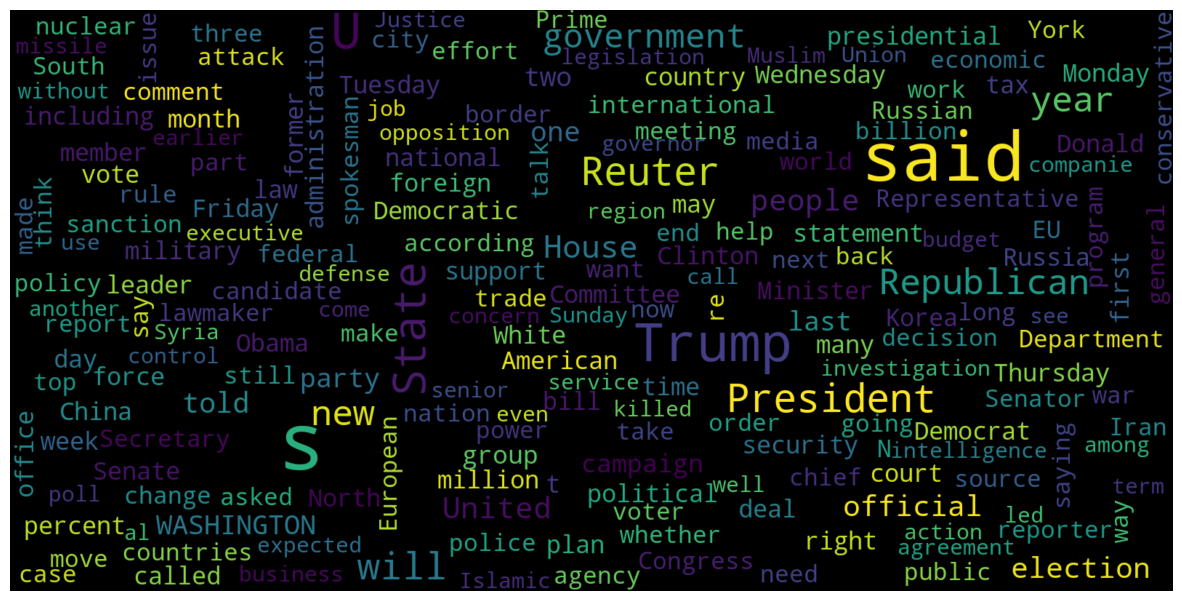

In [21]:
# Let’s visualize the WordCloud for Fake and True news separately
# For True

consolidated = ' '.join(
    word for word in dataframe['text'][dataframe['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

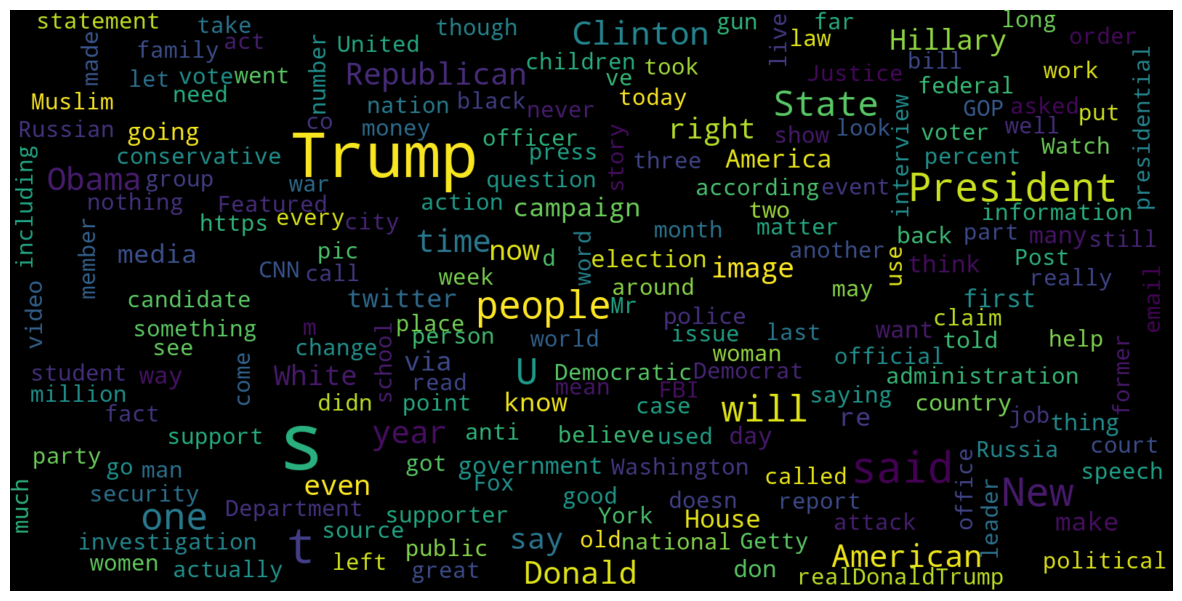

In [22]:
# Assuming 'dataframe' is your pandas DataFrame containing the news texts and their classification
# Replace 'dataframe' with the actual variable name of your DataFrame if different

# For Fake news (assuming class == 0 represents Fake news)
consolidated = ' '.join(word for word in dataframe['text'][dataframe['class'] == 0].astype(str))

# Create a WordCloud object
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)

# Visualize the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

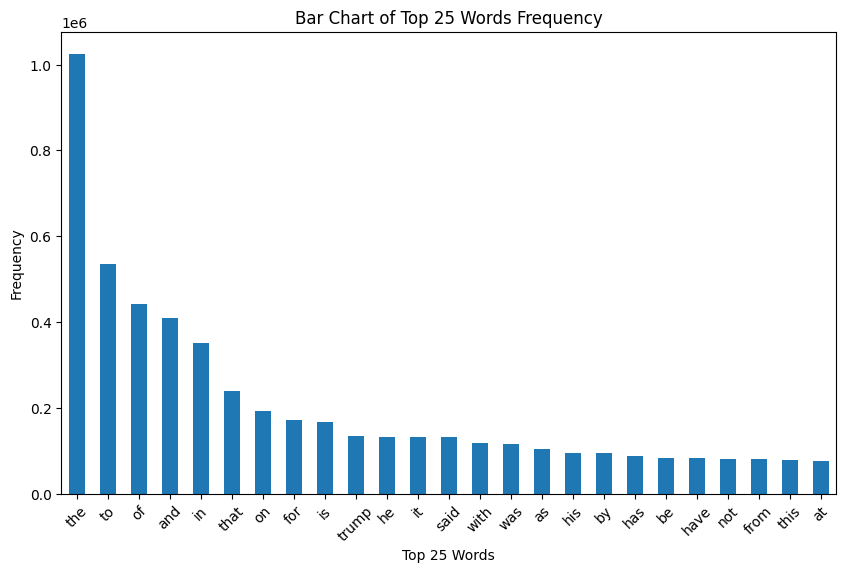

In [23]:
# Now, Let’s plot the bargraph of the top 25 most frequent words.

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming 'dataframe' is your pandas DataFrame and it contains a column 'text' with the text data
common_words = get_top_n_words(dataframe['text'], 25)
df1 = pd.DataFrame(common_words, columns=['Word', 'Count'])  # Rename column for clarity

# Plotting directly from df1 without redundant grouping or sorting
df1.plot(
    kind='bar',
    figsize=(10, 6),
    x='Word',  # Specify the column for x-axis labels
    y='Count',  # Specify the column for y-axis values
    legend=False,  # No need for legend for a single series plot
    title="Bar Chart of Top 25 Words Frequency",
    xlabel="Top 25 Words",
    ylabel="Frequency"
)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Function to Process the Texts

In [24]:
import re
import pandas as pd
import string
from sklearn.model_selection import train_test_split

def wordopt(t):
    tt = t.lower()
    t = re.sub(r'\[.*?\]', '', t)
    t = re.sub(r'\\W', ' ', t)
    t = re.sub(r'https?://\S+|www\.\S+', '', t)
    t = re.sub(r'<.*?>+', '', t)
    t = re.sub(r'[%s]' % re.escape(string.punctuation), '', t)
    t = re.sub(r'\n', '', t)
    t = re.sub(r'\w*\d\w*', '', t)
    return t

dataframe["text"] = dataframe["text"].apply(wordopt)

# Now we will define the dependent variable and independent variables
x = dataframe["text"]
y = dataframe["class"]

# Splitting the Dataset into a Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Covert Text to Vectors

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Modelling

#### Creating a mathematical model of a system or dataset involves utilizing a variety of techniques and algorithms.
#### Here we will use different machine learning algorithms to train them on the dataset and later use them for the prediction of fake news.

### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()  
LR.fit(xv_train,y_train)

LogisticRegression()

In [28]:
LR.score(xv_test, y_test)

0.9861853832442068

In [29]:
pred_LR=LR.predict(xv_test)

from sklearn.metrics import classification_report

# Assuming y_test and pred_LR are defined
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5788
           1       0.98      0.99      0.99      5432

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 2. Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()  
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(xv_test)  
DT.score(xv_test, y_test) 

0.9951871657754011

In [32]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5788
           1       0.99      1.00      1.00      5432

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### 3. Gradient Boost Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier 
GBC = GradientBoostingClassifier(random_state=0)  
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [34]:
pred_gbc = GBC.predict(xv_test)  
GBC.score(xv_test, y_test) 

0.9949197860962566

In [35]:
print(classification_report(y_test, pred_gbc)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5788
           1       0.99      1.00      0.99      5432

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### 4. Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier 
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)  

0.986096256684492

In [38]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5788
           1       0.99      0.98      0.99      5432

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



#### Here, The accuracy of all the machine learning models is almost the same, 99%.

### Model Testing

#### Here, we are going to use all four models to check whether they are capable of detecting fake news.

In [34]:
def output_label(n):  
    if n == 0:  
        return "Fake News"  
    elif n == 1:  
        return "True News"  

def manual_testing(news):  
    testing_news = {"text": [news]}  
    new_def_test = pd.DataFrame(testing_news)  
    new_def_test["text"] = new_def_test["text"].apply(wordopt)  
    new_x_test = new_def_test["text"]  
    new_xv_test = vectorization.transform(new_x_test)  
    pred_LR = LR.predict(new_xv_test)  
    pred_DT = DT.predict(new_xv_test)  
    pred_GBC = GBC.predict(new_xv_test)  
    pred_RFC = RFC.predict(new_xv_test) 

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]), output_label(pred_DT[0]), output_label(pred_GBC[0]), output_label(pred_RFC[0]))
    )

In [26]:
news = str(input())  
manual_testing(news) 

 Not geeting errror


NameError: name 'manual_testing' is not defined

In [37]:
# save model
import pickle
filename = 'finalized_model.pkl'
pickle.dump(vectorization, open(filename, 'wb')) 